In [2]:
import pandas
import matplotlib as plt
%matplotlib inline
import csv
import seaborn as sls
from scipy.stats import kendalltau
from time import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import sys
import numpy
from six.moves import xrange
import tensorflow as tf
from sklearn import neighbors
from sklearn.svm import SVC
from tpot import TPOT
from sklearn.neural_network import MLPClassifier

def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [3]:
train_set = pandas.read_csv("train.csv")

In [4]:
def convert(frame):
    return frame.iloc[:,1:].values


def show_pic(img):
    img = img.reshape(28,28)
    plt.pyplot.imshow(img, interpolation='nearest')

In [5]:
y = train_set.label
x = []
for i in range(42000):
    x.append(list(convert(train_set[i:i + 1])[0]))
    
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
def kaggle_sub(sample, test_predict):
    for i in range(28000):
        sample.Label[i] = test_predict[i]
    sample.to_csv('submit.csv', columns=['ImageId', 'Label'], index=False)
kaggle_sub(sample,test_predict)

KNN с различными количествами соседей от 1 до 20 и одинаковой ценностью каждого соседа.

In [5]:
n_jobs = -1

print("Started to fitting KNN on data with %d cores..." % 8 if n_jobs == -1 else n_jobs)

accuracy_values = []
for number in range(1,20):
    t0 = time()

    clf = neighbors.KNeighborsClassifier(number, n_jobs=n_jobs, weights='uniform')

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on KNN with ', number, ' neighbor')
    accuracy_values.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()

Started to fitting KNN on data with 8 cores...
We have  0.970952380952 of accuracy on KNN with  1  neighbor
done in 86.683s

We have  0.964404761905 of accuracy on KNN with  2  neighbor
done in 85.193s

We have  0.969761904762 of accuracy on KNN with  3  neighbor
done in 83.734s

We have  0.967619047619 of accuracy on KNN with  4  neighbor
done in 84.356s

We have  0.968095238095 of accuracy on KNN with  5  neighbor
done in 86.186s

We have  0.967380952381 of accuracy on KNN with  6  neighbor
done in 85.625s

We have  0.967738095238 of accuracy on KNN with  7  neighbor
done in 101.367s

We have  0.967023809524 of accuracy on KNN with  8  neighbor
done in 99.815s

We have  0.966785714286 of accuracy on KNN with  9  neighbor
done in 106.013s

We have  0.965119047619 of accuracy on KNN with  10  neighbor
done in 106.116s

We have  0.963928571429 of accuracy on KNN with  11  neighbor
done in 112.595s

We have  0.962261904762 of accuracy on KNN with  12  neighbor
done in 112.811s

We have  

Распределение ошибки в зависимости от количества соседей

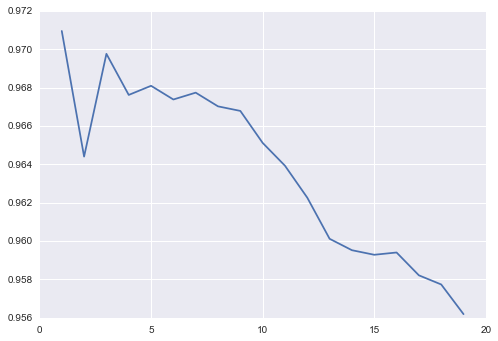

In [6]:
x_neib = numpy.array([i for i in range(1,20)])
plt.pyplot.plot(x_neib,accuracy_values)

KNN для различного количества соседей с изменением веса в зависимости от удаленности соседа

In [7]:
n_jobs = -1

print("Started to fitting KNN on data with %d cores..." % 8 if n_jobs == -1 else n_jobs)

accuracy_values = []
for number in range(1,20):
    t0 = time()

    clf = neighbors.KNeighborsClassifier(number, n_jobs=n_jobs, weights='distance')

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on KNN with ', number, ' neighbor')
    accuracy_values.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()

Started to fitting KNN on data with 8 cores...
We have  0.970952380952 of accuracy on KNN with  1  neighbor
done in 88.269s

We have  0.970952380952 of accuracy on KNN with  2  neighbor
done in 92.713s

We have  0.970714285714 of accuracy on KNN with  3  neighbor
done in 93.633s

We have  0.9725 of accuracy on KNN with  4  neighbor
done in 97.906s

We have  0.970357142857 of accuracy on KNN with  5  neighbor
done in 99.610s

We have  0.97119047619 of accuracy on KNN with  6  neighbor
done in 100.097s

We have  0.968571428571 of accuracy on KNN with  7  neighbor
done in 98.970s

We have  0.969523809524 of accuracy on KNN with  8  neighbor
done in 99.758s

We have  0.96869047619 of accuracy on KNN with  9  neighbor
done in 99.456s

We have  0.967261904762 of accuracy on KNN with  10  neighbor
done in 98.244s

We have  0.965714285714 of accuracy on KNN with  11  neighbor
done in 96.456s

We have  0.964880952381 of accuracy on KNN with  12  neighbor
done in 96.304s

We have  0.962619047619

Распределение ошибки для зависимой от расстояния ценности соседа

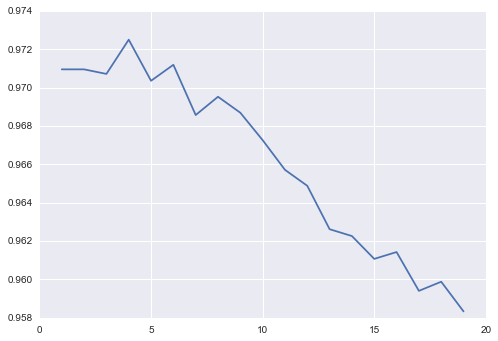

In [8]:
x_neib = numpy.array([i for i in range(1,20)])
plt.pyplot.plot(x_neib,accuracy_values)

SVM с различными коэффициентами

In [9]:
print("Started to fitting SVM on data")

accuracy_values_SVM = []
for number in [0.5, 0.7, 1]:
    t0 = time()

    clf = SVC(C=number)

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on SVC with C=', number)
    accuracy_values.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()

Started to fitting SVM on data
We have  0.114404761905 of accuracy on SVC with C= 0.5
done in 3119.694s

We have  0.114404761905 of accuracy on SVC with C= 0.7
done in 3078.368s

We have  0.114404761905 of accuracy on SVC with C= 1
done in 2953.908s



Не имеем никакой разницы в зависимости от параметра =(

SVM с измененным ядром для полиномов от 1 до 10

In [10]:
print("Started to fitting poly SVM on data")

accuracy_values_poly_SVM = []
for number in range(1,10):
    t0 = time()

    clf = SVC(kernel='poly', degree=number)

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on poly SVC with degree =', number)
    accuracy_values_poly_SVM.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()

Started to fitting poly SVM on data
We have  0.919047619048 of accuracy on poly SVC with degree = 1
done in 412.535s

We have  0.977738095238 of accuracy on poly SVC with degree = 2
done in 167.451s

We have  0.974047619048 of accuracy on poly SVC with degree = 3
done in 173.696s

We have  0.969166666667 of accuracy on poly SVC with degree = 4
done in 185.534s

We have  0.959761904762 of accuracy on poly SVC with degree = 5
done in 206.720s

We have  0.947619047619 of accuracy on poly SVC with degree = 6
done in 234.237s

We have  0.932380952381 of accuracy on poly SVC with degree = 7
done in 268.058s

We have  0.919642857143 of accuracy on poly SVC with degree = 8
done in 306.511s

We have  0.903214285714 of accuracy on poly SVC with degree = 9
done in 347.078s



Точность в зависимости от различных ядер

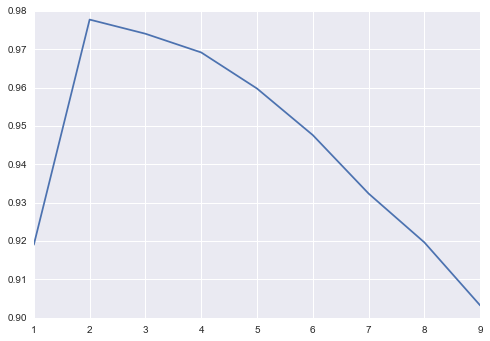

In [11]:
x_neib = numpy.array([i for i in range(1,10)])
plt.pyplot.plot(x_neib,accuracy_values_poly_SVM)

Обычное дерево решений

In [16]:
print("Started to fitting DecisionTreeClassifier on data")

t0 = time()

forest = DecisionTreeClassifier()

forest.fit(X_train, y_train)

y_predict = forest.predict(X_test)

print('we have ', accuracy_score(y_test, y_predict), 'of accuracy on DecisionTreeClassifier')

print("done in %0.3fs" % (time() - t0))

Started to fitting DecisionTreeClassifier on data
we have  0.8525 of accuracy on DecisionTreeClassifier
done in 12.799s


RandomForest с 2000 тысячами деревьев и голосованием для выбора предсказания.

In [8]:
n_jobs = -1

print("Started to fitting ExtraTreesClassifier on data with %d cores..." % 8 if n_jobs == -1 else n_jobs)

t0 = time()

forest = ExtraTreesClassifier(n_estimators=2000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X_train, y_train)

y_predict = forest.predict(X_test)

print('we have ', accuracy_score(y_test, y_predict), 'of accuracy on ExtraTreeClassifier')

print("done in %0.3fs" % (time() - t0))

Started to fitting ExtraTreesClassifier on data with 8 cores...
we have  0.971547619048 of accuracy on ExtraTreeClassifier
done in 491.892s


Градиентный бустинг решающих деревьев

In [18]:
print("Started to fitting GradientBoostingClassifier on data")

t0 = time()

forest = GradientBoostingClassifier()

forest.fit(X_train, y_train)

y_predict = forest.predict(X_test)

print('we have ', accuracy_score(y_test, y_predict), 'of accuracy on GradientBoostingClassifier')

print("done in %0.3fs" % (time() - t0))


Started to fitting GradientBoostingClassifier on data
we have  0.943928571429 of accuracy on GradientBoostingClassifier
done in 1382.034s


RandomForest с различным количеством деревьев

In [19]:
print("Started to fitting RandomForest on data")

accuracy_values_random_forest = []
for number in [2, 10, 100, 300, 700, 1000, 2000]:
    t0 = time()

    clf = RandomForestClassifier(n_estimators=number, n_jobs=-1)

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on RandomForest with trees =', number)
    accuracy_values_random_forest.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()

Started to fitting RandomForest on data
We have  0.784404761905 of accuracy on RandomForest with trees = 2
done in 2.902s

We have  0.934166666667 of accuracy on RandomForest with trees = 10
done in 3.185s

We have  0.964523809524 of accuracy on RandomForest with trees = 100
done in 7.170s

We have  0.966547619048 of accuracy on RandomForest with trees = 300
done in 17.586s

We have  0.966428571429 of accuracy on RandomForest with trees = 700
done in 36.240s

We have  0.965952380952 of accuracy on RandomForest with trees = 1000
done in 51.613s

We have  0.96619047619 of accuracy on RandomForest with trees = 2000
done in 108.641s



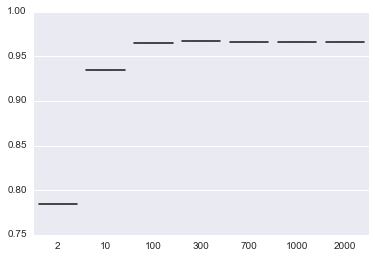

In [30]:
x_neib = numpy.array([2, 10, 100, 300, 700, 1000, 2000])
sls.boxplot(x_neib,accuracy_values_random_forest)

AdaBoost с различных количеством решающих деревьев

In [31]:
print("Started to fitting AdaBoost on data")

accuracy_values_Ada = []
for number in [2, 10, 100, 300, 700, 1000, 2000]:
    t0 = time()

    clf = AdaBoostClassifier(n_estimators=number)

    clf.fit(X_train, y_train)

    y_predict = clf.predict(X_test)
    
    temp_acc = accuracy_score(y_test, y_predict)
    print('We have ', temp_acc, 'of accuracy on AdaBoost with trees =', number)
    accuracy_values_Ada.append(temp_acc)
    print("done in %0.3fs" % (time() - t0))
    print()


Started to fitting AdaBoost on data
We have  0.321547619048 of accuracy on AdaBoost with trees = 2
done in 4.522s

We have  0.62619047619 of accuracy on AdaBoost with trees = 10
done in 9.582s

We have  0.717857142857 of accuracy on AdaBoost with trees = 100
done in 77.965s

We have  0.648928571429 of accuracy on AdaBoost with trees = 300
done in 226.388s

We have  0.631666666667 of accuracy on AdaBoost with trees = 700
done in 501.802s

We have  0.640833333333 of accuracy on AdaBoost with trees = 1000
done in 685.638s

We have  0.658452380952 of accuracy on AdaBoost with trees = 2000
done in 1333.760s



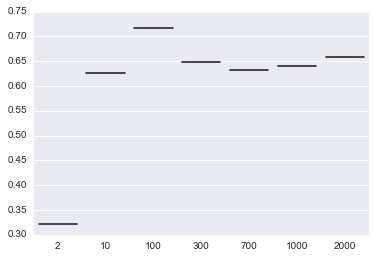

In [32]:
x_neib = numpy.array([2, 10, 100, 300, 700, 1000, 2000])
sls.boxplot(x_neib,accuracy_values_Ada)

Генетический алгоритм подбора наилучших параметров

In [9]:
print('Started to fitting')
t0 = time()
tpot = TPOT(generations=10, verbosity=2)
tpot.fit(X_train, numpy.array(y_train))
print(tpot.score(X_test, y_test))
print("done in %0.3fs" % (time() - t0))

result1 = tpot_data.copy()

bnb1 = BernoulliNB(alpha=1e-05, binarize=0.03)
bnb1.fit(result1.loc[training_indices].drop('class', axis=1).values, result1.loc[training_indices, 'class'].values)

result1['bnb1-classification'] = bnb1.predict(result1.drop('class', axis=1).values)


training_features = result1.loc[training_indices].drop('class', axis=1)
training_class_vals = result1.loc[training_indices, 'class'].values

if len(training_features.columns.values) == 0:
    result2 = result1.copy()
else:
    selector = SelectKBest(f_classif, k=min(38, len(training_features.columns)))
    selector.fit(training_features.values, training_class_vals)
    mask = selector.get_support(True)
    mask_cols = list(training_features.iloc[:, mask].columns) + ['class']
    result2 = result1[mask_cols]


Started to fitting


Generation 1 - Current best internal CV score: 0.88261


Generation 2 - Current best internal CV score: 0.88261


Generation 3 - Current best internal CV score: 0.88261


Generation 4 - Current best internal CV score: 0.88261


Generation 5 - Current best internal CV score: 0.88261


Generation 6 - Current best internal CV score: 0.88261


Generation 7 - Current best internal CV score: 0.88261


Generation 8 - Current best internal CV score: 0.88261


Generation 9 - Current best internal CV score: 0.88261


Generation 10 - Current best internal CV score: 0.88261



Best pipeline: _select_kbest(_bernoulli_nb(input_df, 1.0000000000000001e-05, 0.029999999999999999), 38)
0.0
done in 555.827s


6 слойный перцептрон с параметрами 784-2500-2000-1500-1000-500-10 со стохастическим градиентным спуском и различными функциями активации и алгоритмами

In [12]:
print("Started to fitting MLPClassifier on data")

accuracy_values_MLPClassifier = []
for activate_type in ['logistic', 'tanh', 'relu']:
    for algo in ['sgd', 'adam', 'l-bfgs']:
        t0 = time()

        clf = MLPClassifier(verbose=True, activation=activate_type, learning_rate='adaptive',
                            hidden_layer_sizes=(2500, 2000, 1500, 1000, 500))

        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)

        temp_acc = accuracy_score(y_test, y_predict)
        print('We have ', temp_acc,
              'of accuracy on MLPclassifier with activation function =',
              activate_type, 'with ', algo, 'algorythm')
        accuracy_values_MLPClassifier.append(temp_acc)
        print("done in %0.3fs" % (time() - t0))
        print()


Started to fitting MLPClassifier on data
Iteration 1, loss = 0.87510415
Iteration 2, loss = 0.31951016
Iteration 3, loss = 0.27244733
Iteration 4, loss = 0.23901066
Iteration 5, loss = 0.23766333
Iteration 6, loss = 0.21435707
Iteration 7, loss = 0.21254382
Iteration 8, loss = 0.19835075
Iteration 9, loss = 0.19636110
Iteration 10, loss = 0.17523291
Iteration 11, loss = 0.18589492
Iteration 12, loss = 0.17654913
Iteration 13, loss = 0.17054411
Iteration 14, loss = 0.16244333
Iteration 15, loss = 0.15656101
Iteration 16, loss = 0.16103789
Iteration 17, loss = 0.15590492
Iteration 18, loss = 0.15037203
Iteration 19, loss = 0.14901456
Iteration 20, loss = 0.14516383
Iteration 21, loss = 0.13650559
Iteration 22, loss = 0.13388478
Iteration 23, loss = 0.14489743
Iteration 24, loss = 0.13223027
Iteration 25, loss = 0.12863507
Iteration 26, loss = 0.14548051
Iteration 27, loss = 0.12500395
Iteration 28, loss = 0.12471742
Iteration 29, loss = 0.12805905
Iteration 30, loss = 0.12056053
Iteratio

Напоследок сверточная нейронная сеть с 5 слоями

In [80]:
IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_LABELS = 10
VALIDATION_SIZE = 5000 
SEED = 66478  
BATCH_SIZE = 64
NUM_EPOCHS = 10
EVAL_BATCH_SIZE = 64
EVAL_FREQUENCY = 100

def error_rate(predictions, labels):
  return 100.0 - (
      100.0 *
      numpy.sum(numpy.argmax(predictions, 1) == labels) /
      predictions.shape[0])

def main(argv=None): 
  train = pandas.read_csv('train.csv')
  train_data = []
  for i in range(42000):
    temp = list(convert(train[i:i + 1])[0])
    temp = np.array(temp)

    temp.shape = ((28), (28), (1))
    temp = (temp - (255 / 2.0)) / 255
    #train_data.append(list(convert(train_set[i:i + 1])[0]))
    train_data.append(temp)
  train_labels = train.label

  test = pandas.read_csv('test.csv')
  test_data = []
  for i in range(28000):
    temp = list(test[i:i + 1].iloc[:,0:].values[0])
    temp = np.array(temp)

    temp.shape = ((28), (28), (1))
    temp = (temp - (255 / 2.0)) / 255
    test_data.append(temp)
    
  train_data = np.array(train_data)
  test_data = np.array(test_data)
  validation_data = train_data[:VALIDATION_SIZE, ...]
  validation_labels = train_labels[:VALIDATION_SIZE]
  train_data = train_data[VALIDATION_SIZE:, ...]
  train_labels = train_labels[VALIDATION_SIZE:]
  num_epochs = NUM_EPOCHS
  train_size = train_labels.shape[0]

  train_data_node = tf.placeholder(
      tf.float32,
      shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
  train_labels_node = tf.placeholder(tf.int64, shape=(BATCH_SIZE,))
  eval_data = tf.placeholder(
      tf.float32,
      shape=(EVAL_BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))

  conv1_weights = tf.Variable(
      tf.truncated_normal([5, 5, NUM_CHANNELS, 32],  
                          stddev=0.1,
                          seed=SEED))
  conv1_biases = tf.Variable(tf.zeros([32]))
  conv2_weights = tf.Variable(
      tf.truncated_normal([5, 5, 32, 64],
                          stddev=0.1,
                          seed=SEED))
  conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]))
  fc1_weights = tf.Variable(  
      tf.truncated_normal(
          [IMAGE_SIZE // 4 * IMAGE_SIZE // 4 * 64, 512],
          stddev=0.1,
          seed=SEED))
  fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))
  fc2_weights = tf.Variable(
      tf.truncated_normal([512, NUM_LABELS],
                          stddev=0.1,
                          seed=SEED))
  fc2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))

  def model(data, train=False):
    conv = tf.nn.conv2d(data,
                        conv1_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))

    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
    conv = tf.nn.conv2d(pool,
                        conv2_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
    pool_shape = pool.get_shape().as_list()
    reshape = tf.reshape(
        pool,
        [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)

    if train:
      hidden = tf.nn.dropout(hidden, 0.5, seed=SEED)
    return tf.matmul(hidden, fc2_weights) + fc2_biases

  logits = model(train_data_node, True)
  loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
      logits, train_labels_node))

  regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                  tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases))
  loss += 5e-4 * regularizers

  batch = tf.Variable(0)
  learning_rate = tf.train.exponential_decay(
      0.01,                
      batch * BATCH_SIZE,  
      train_size,          
      0.95,                
      staircase=True)

  optimizer = tf.train.MomentumOptimizer(learning_rate,
                                         0.9).minimize(loss,
                                                       global_step=batch)

  train_prediction = tf.nn.softmax(logits)

  eval_prediction = tf.nn.softmax(model(eval_data))

  def eval_in_batches(data, sess):
    size = data.shape[0]
    if size < EVAL_BATCH_SIZE:
      raise ValueError("batch size for evals larger than dataset: %d" % size)
    predictions = numpy.ndarray(shape=(size, NUM_LABELS), dtype=numpy.float32)
    for begin in xrange(0, size, EVAL_BATCH_SIZE):
      end = begin + EVAL_BATCH_SIZE
      if end <= size:
        predictions[begin:end, :] = sess.run(
            eval_prediction,
            feed_dict={eval_data: data[begin:end, ...]})
      else:
        batch_predictions = sess.run(
            eval_prediction,
            feed_dict={eval_data: data[-EVAL_BATCH_SIZE:, ...]})
        predictions[begin:, :] = batch_predictions[begin - size:, :]
    return predictions

  start_time = time.time()
  with tf.Session() as sess:
    tf.initialize_all_variables().run()
    print('Initialized!')
    for step in xrange(int(num_epochs * train_size) // BATCH_SIZE):
      offset = (step * BATCH_SIZE) % (train_size - BATCH_SIZE)
      batch_data = train_data[offset:(offset + BATCH_SIZE), ...]
      batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
      feed_dict = {train_data_node: batch_data,
                   train_labels_node: batch_labels}

      _, l, lr, predictions = sess.run(
          [optimizer, loss, learning_rate, train_prediction],
          feed_dict=feed_dict)
      if step % EVAL_FREQUENCY == 0:
        elapsed_time = time.time() - start_time
        start_time = time.time()
        print('Step %d (epoch %.2f), %.1f ms' %
              (step, float(step) * BATCH_SIZE / train_size,
               1000 * elapsed_time / EVAL_FREQUENCY))
        print('Minibatch loss: %.3f, learning rate: %.6f' % (l, lr))
        print('Minibatch error: %.1f%%' % error_rate(predictions, batch_labels))
        print('Validation error: %.1f%%' % error_rate(
            eval_in_batches(validation_data, sess), validation_labels))
        sys.stdout.flush()
        
    print('Final!')
    out = eval_in_batches(test_data, sess)
    pandas.DataFrame(out).to_csv('Kaggle.csv')

if __name__ == '__main__':
  tf.app.run()

Initialized!
Step 0 (epoch 0.00), 7.7 ms
Minibatch loss: 11.511, learning rate: 0.010000
Minibatch error: 96.9%
Validation error: 84.3%
Step 100 (epoch 0.17), 112.2 ms
Minibatch loss: 3.473, learning rate: 0.010000
Minibatch error: 18.8%
Validation error: 6.6%
Step 200 (epoch 0.35), 115.0 ms
Minibatch loss: 3.358, learning rate: 0.010000
Minibatch error: 10.9%
Validation error: 4.2%
Step 300 (epoch 0.52), 120.5 ms
Minibatch loss: 3.383, learning rate: 0.010000
Minibatch error: 7.8%
Validation error: 3.3%
Step 400 (epoch 0.69), 119.0 ms
Minibatch loss: 3.109, learning rate: 0.010000
Minibatch error: 4.7%
Validation error: 2.6%
Step 500 (epoch 0.86), 117.9 ms
Minibatch loss: 3.120, learning rate: 0.010000
Minibatch error: 6.2%
Validation error: 2.4%
Step 600 (epoch 1.04), 114.5 ms
Minibatch loss: 3.098, learning rate: 0.009500
Minibatch error: 4.7%
Validation error: 2.1%
Step 700 (epoch 1.21), 113.6 ms
Minibatch loss: 2.999, learning rate: 0.009500
Minibatch error: 3.1%
Validation error:

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
test = pandas.read_csv('Kaggle.csv')
pred = []
for i in range(28000):
    temp = list(test[i:i + 1].iloc[:,1:].values[0])
    mn = max(temp)
    for i in range(len(temp)):
        if mn == temp[i]:
            pred.append(i)
            break
sample = pandas.read_csv('sample_submission.csv')
kaggle_sub(sample,pred)

Сабмит на Kaggle, имеем 144 место в общем зачете и score=0.99171.